In [1]:
%matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Load the counts matrix
counts_file = '../data/GSE100866_CBMC_8K_13AB_10X-RNA_umi.csv'
counts = pd.read_csv(counts_file,sep=',',index_col=0)
# rows are gene IDs, columns are cell barcodes


In [3]:
# determine sample labels
labels_file = '../data/GSE100866_CBMC_8K_13AB_10X-ADT_clr-transformed.csv'
labels = pd.read_csv(labels_file,sep=',',index_col=0)
# rows are cell surface markers, columns are cell barcodes

In [4]:
# extract the gene IDs relevant to each cell surface marker
gene_ids = counts.index
# try to find genes that contain marker names
marker_names = labels.index
marker_names

Index(['CD3', 'CD4', 'CD8', 'CD45RA', 'CD56', 'CD16', 'CD10', 'CD11c', 'CD14',
       'CD19', 'CD34', 'CCR5', 'CCR7'],
      dtype='object')

In [5]:
# find exact matches first
marker_to_genes = {}
for marker in marker_names:
    marker_to_genes[marker] = []
    for gene_id in gene_ids:
        if gene_id == 'HUMAN_' + marker:
            marker_to_genes[marker].append(gene_id)

In [6]:
marker_to_genes

{'CCR5': ['HUMAN_CCR5'],
 'CCR7': ['HUMAN_CCR7'],
 'CD10': [],
 'CD11c': [],
 'CD14': ['HUMAN_CD14'],
 'CD16': [],
 'CD19': ['HUMAN_CD19'],
 'CD3': [],
 'CD34': ['HUMAN_CD34'],
 'CD4': ['HUMAN_CD4'],
 'CD45RA': [],
 'CD56': [],
 'CD8': []}

In [7]:
# for markers that didn't have an exact match, search for partial matches
partial_matches = {}
for marker in marker_to_genes.keys():
    if not marker_to_genes[marker]: # if the list is empty
        partial_matches[marker] = []
        for gene_id in gene_ids:
            if gene_id.find(marker) > -1:
                partial_matches[marker].append(gene_id)

In [8]:
partial_matches

{'CD10': ['HUMAN_CD101', 'HUMAN_CD109', 'HUMAN_PDCD10'],
 'CD11c': [],
 'CD16': ['HUMAN_CD160', 'HUMAN_CD163', 'HUMAN_CD163L1', 'HUMAN_CD164'],
 'CD3': ['HUMAN_ABCD3',
  'HUMAN_C2CD3',
  'HUMAN_CD300A',
  'HUMAN_CD300C',
  'HUMAN_CD300E',
  'HUMAN_CD300LB',
  'HUMAN_CD300LD',
  'HUMAN_CD300LF',
  'HUMAN_CD302',
  'HUMAN_CD320',
  'HUMAN_CD33',
  'HUMAN_CD34',
  'HUMAN_CD36',
  'HUMAN_CD37',
  'HUMAN_CD38',
  'HUMAN_CD3D',
  'HUMAN_CD3E',
  'HUMAN_CD3EAP',
  'HUMAN_CD3G',
  'HUMAN_NUDCD3',
  'HUMAN_PLCD3',
  'HUMAN_PTCD3',
  'HUMAN_SMARCD3'],
 'CD45RA': [],
 'CD56': [],
 'CD8': ['HUMAN_CD81',
  'HUMAN_CD82',
  'HUMAN_CD83',
  'HUMAN_CD84',
  'HUMAN_CD86',
  'HUMAN_CD8A',
  'HUMAN_CD8B']}

In [9]:
# Based on the partial matches, define a dictionary with correct mappings
# Also include results from a manual search for synonyms
additional_mappings = {\
    'CD3':['HUMAN_CD3D','HUMAN_CD3E','HUMAN_CD3EAP','HUMAN_CD3G'],\
    'CD8':['HUMAN_CD8A','HUMAN_CD8B'],\
    'CD10':['HUMAN_MME'],\
    'CD11c':['HUMAN_ITGAX'],\
    'CD16':['HUMAN_FCGR3A','HUMAN_FCGR3B'],\
    'CD45RA':['HUMAN_PTPRC'],\
    'CD56':['HUMAN_NCAM1']
    }

In [10]:
# combine the exact matches and the manually-inferred mappings
final_gene_mappings = marker_to_genes.copy()
for gene_id in additional_mappings:
    final_gene_mappings[gene_id] = additional_mappings[gene_id]

In [11]:
final_gene_mappings

{'CCR5': ['HUMAN_CCR5'],
 'CCR7': ['HUMAN_CCR7'],
 'CD10': ['HUMAN_MME'],
 'CD11c': ['HUMAN_ITGAX'],
 'CD14': ['HUMAN_CD14'],
 'CD16': ['HUMAN_FCGR3A', 'HUMAN_FCGR3B'],
 'CD19': ['HUMAN_CD19'],
 'CD3': ['HUMAN_CD3D', 'HUMAN_CD3E', 'HUMAN_CD3EAP', 'HUMAN_CD3G'],
 'CD34': ['HUMAN_CD34'],
 'CD4': ['HUMAN_CD4'],
 'CD45RA': ['HUMAN_PTPRC'],
 'CD56': ['HUMAN_NCAM1'],
 'CD8': ['HUMAN_CD8A', 'HUMAN_CD8B']}

In [12]:
# for each marker and associated gene_id, perform pearson correlation
# between the two.
correlation_results = {}
for marker in final_gene_mappings.keys():
    # get the value of marker gene from each cell
    marker_values = labels.loc[marker,]
    for gene_id in final_gene_mappings[marker]:
        gene_counts = counts.loc[gene_id,]
        result = stats.spearmanr(a=gene_counts, b=marker_values, axis=0)
        print(marker,gene_id,result)
        correlation_results[gene_id] = {'ADT_marker':marker,'correlation':result.correlation,'pvalue':result.pvalue}
        

CD11c HUMAN_ITGAX SpearmanrResult(correlation=0.21078745385343306, pvalue=3.8679515038378114e-87)
CD16 HUMAN_FCGR3A SpearmanrResult(correlation=0.49052392350288132, pvalue=0.0)
CD16 HUMAN_FCGR3B SpearmanrResult(correlation=0.087633216944107903, pvalue=3.660382695607334e-16)
CD3 HUMAN_CD3D SpearmanrResult(correlation=0.62326263492201817, pvalue=0.0)
CD3 HUMAN_CD3E SpearmanrResult(correlation=0.63536511124003303, pvalue=0.0)
CD3 HUMAN_CD3EAP SpearmanrResult(correlation=0.012720732908186696, pvalue=0.23771632594119635)
CD3 HUMAN_CD3G SpearmanrResult(correlation=0.48432652594856757, pvalue=0.0)
CD34 HUMAN_CD34 SpearmanrResult(correlation=0.17102933855357061, pvalue=1.4544562782908765e-57)
CCR5 HUMAN_CCR5 SpearmanrResult(correlation=0.031343299977977974, pvalue=0.0036163432755362541)
CCR7 HUMAN_CCR7 SpearmanrResult(correlation=0.1079040938314365, pvalue=9.7253502445044284e-24)
CD8 HUMAN_CD8A SpearmanrResult(correlation=0.29397115374973276, pvalue=2.4173502593926323e-171)
CD8 HUMAN_CD8B Spea

In [13]:
correlation_results_frame = pd.DataFrame(correlation_results)
correlation_results_frame

,HUMAN_CCR5,HUMAN_CCR7,HUMAN_CD14,HUMAN_CD19,HUMAN_CD34,HUMAN_CD3D,HUMAN_CD3E,HUMAN_CD3EAP,HUMAN_CD3G,HUMAN_CD4,HUMAN_CD8A,HUMAN_CD8B,HUMAN_FCGR3A,HUMAN_FCGR3B,HUMAN_ITGAX,HUMAN_MME,HUMAN_NCAM1,HUMAN_PTPRC
ADT_marker,CCR5,CCR7,CD14,CD19,CD34,CD3,CD3,CD3,CD3,CD4,CD8,CD8,CD16,CD16,CD11c,CD10,CD56,CD45RA
correlation,0.0313433,0.107904,0.405775,0.179581,0.171029,0.623263,0.635365,0.0127207,0.484327,0.144951,0.293971,0.239404,0.490524,0.0876332,0.210787,0.0291755,0.1342,0.0525272
pvalue,0.00361634,9.72535e-24,0,2.26243e-63,1.45446e-57,0,0,0.237716,0,1.11284e-41,2.41735e-171,1.37901e-112,0,3.66038e-16,3.86795e-87,0.00675916,6.39325e-36,1.06815e-06


In [14]:
# save the correlation results
correlation_results_frame.to_csv('../results/marker_associated_transcript_correlation.tsv',sep='\t')

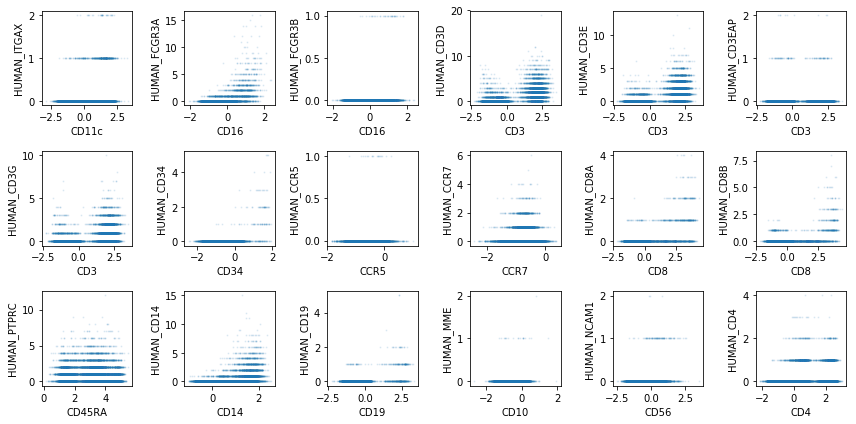

In [29]:
# plot some examples of correlated markers/transcripts
#marker = 'CD14'
#gene_id = 'HUMAN_CD14'
fig,ax = plt.subplots(3,6)
ax = np.ravel(ax) # flatten the 6x3 array into a 1x18 array
i = 0
for marker in final_gene_mappings.keys():
    for gene_id in final_gene_mappings[marker]:
        marker_data = labels.loc[marker,]
        transcript_data = counts.loc[gene_id,]
        ax[i].scatter(marker_data,transcript_data,alpha=0.1,s=1)
        ax[i].set_xlabel(marker)
        ax[i].set_ylabel(gene_id)
        i += 1
fig.set_size_inches(12,6)
plt.tight_layout()
plt.savefig('../results/all_marker_transcript_scatter.svg')
plt.savefig('../results/all_marker_transcript_scatter.png',dpi=300)

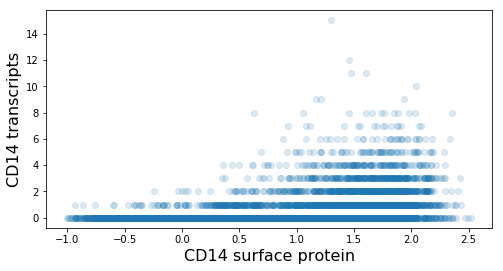

In [28]:
# plot a single example for potential presentation use
marker = 'CD14'
gene_id = 'HUMAN_CD14'
fig,ax = plt.subplots()
marker_data = labels.loc[marker,]
transcript_data = counts.loc[gene_id,]
ax.scatter(marker_data,transcript_data,alpha=0.15)
ax.set_ylabel('CD14 transcripts',size=16)
ax.set_xlabel('CD14 surface protein',size=16)
fig.set_size_inches(8,4)
plt.savefig('../results/example_transcript_marker_scatter.svg')
plt.savefig('../results/example_transcript_marker_scatter.png',dpi=300)

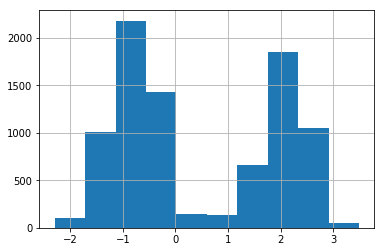

In [23]:
labels.loc['CD3',].hist()

In [27]:
for gene_id in gene_ids:
    if gene_id.find('5S') > -1:
        print(gene_id)

HUMAN_AP5S1
HUMAN_ATP5S
HUMAN_ATP5SL
HUMAN_RNA5SP151
HUMAN_RNA5SP155
HUMAN_RNA5SP161
HUMAN_RNA5SP195
HUMAN_RNA5SP203
HUMAN_RNA5SP207
HUMAN_RNA5SP21
HUMAN_RNA5SP229
HUMAN_RNA5SP282
HUMAN_RNA5SP363
HUMAN_RNA5SP383
HUMAN_RNA5SP387
HUMAN_RNA5SP437
HUMAN_RNA5SP439
HUMAN_RNA5SP450
HUMAN_RNA5SP452
HUMAN_RNA5SP469
HUMAN_RNA5SP473
HUMAN_RNA5SP474
HUMAN_RNA5SP477
HUMAN_RNA5SP478
HUMAN_RNA5SP479
HUMAN_RNA5SP483
HUMAN_RNA5SP492
HUMAN_RNA5SP493
HUMAN_RNA5SP78
